In [2]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)



In [28]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print(df.head(5))


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [23]:
# check number of rows and columns of train data
df.shape

(150, 4)

In [22]:
#iris data
print("There are " + str(len(df)) + " observations in the iris dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

There are 150 observations in the iris dataset.
There are 4 variables in the dataset.


In [27]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing Data

In [24]:
# checking missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [26]:
## Check for Duplicates and Remove 
df.duplicated().sum() 
df.drop_duplicates(inplace = True)

# Data visualizations

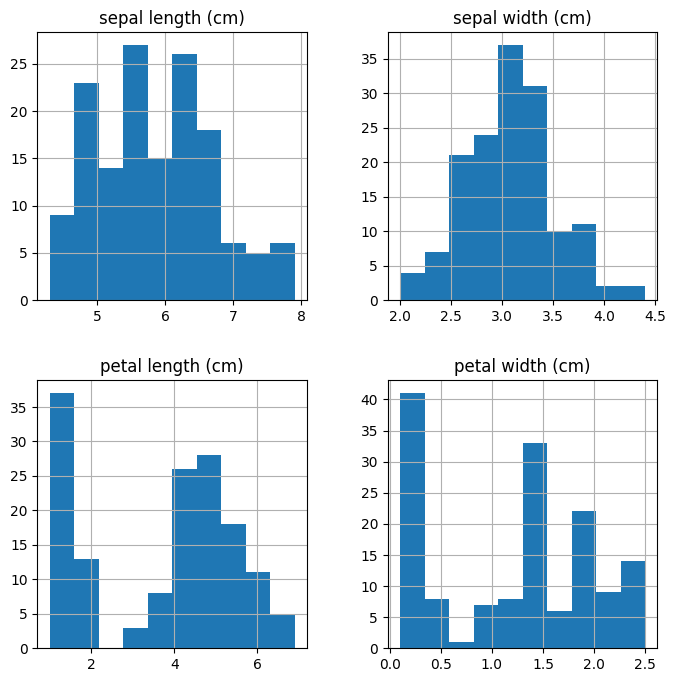

In [29]:
df.hist(figsize=(8,8),)
plt.show()

<Axes: ylabel='count'>

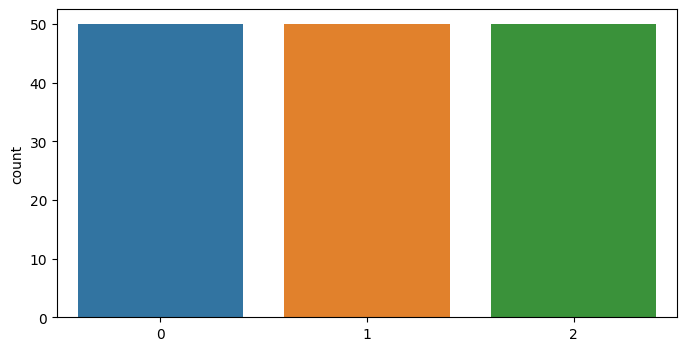

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x=y, ax=ax)

# Split the dataset into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(df, y, test_size=0.2, random_state=3)

# Decision Tree Classifier Model from scikit-learn

In [10]:
# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_trainset)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
dtree = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
dtree.fit(X_trainset, y_trainset, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  0.00407


## Make predictions on the testing data

In [11]:
y_pred=dtree.predict(X_testset)

## Evaluate the model on the testing data

In [12]:
# Evaluate the model on the testing data
accuracy = dtree.score(X_testset, y_testset)
print("Accuracy:", accuracy)  

Accuracy: 1.0


In [13]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')
    
    print('Accuracy', accuracy)
    print('Classification Report', cf_report)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

In [14]:
evaluate(y_testset,y_pred)

Accuracy 1.0
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision 1.0
Recall 1.0
F1-Score 1.0


## the confusion matrix

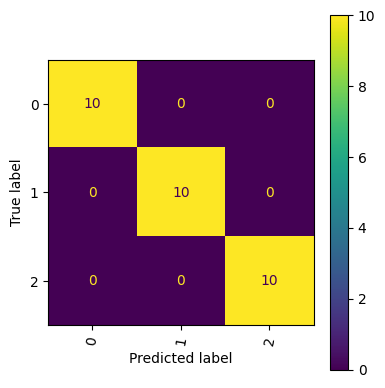

In [15]:
fig, ax = plt.subplots(figsize=(4, 4))
    # Create the confusion matrix
cm = confusion_matrix(y_testset, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=dtree.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [16]:
#Extra Tree - Confusion matrix
print("Confusion Matrix(Select Data By Extra Tree)")
pred_test = dtree.predict(X_testset)
pd.DataFrame(confusion_matrix(y_testset,pred_test), columns=["0","1","2"], index=["0","1","2"])

Confusion Matrix(Select Data By Extra Tree)


,0,1,2
0,10,0,0
1,0,10,0
2,0,0,10


# Decision Tree Visualization

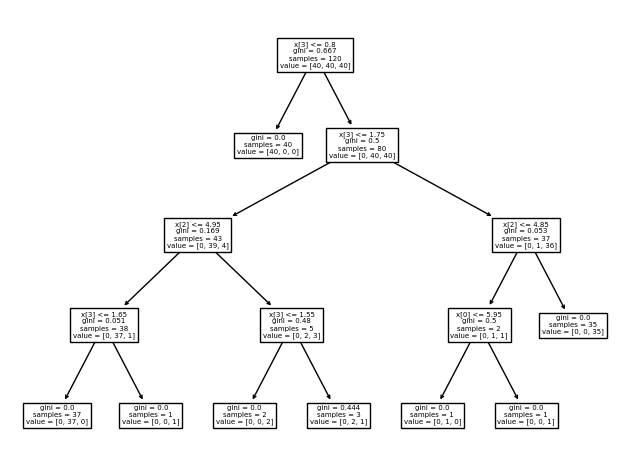

In [17]:
tree.plot_tree(dtree)
plt.tight_layout()
plt.show()

In [18]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 6.7 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=ad563d420af6d9ddbbdef8f2155745e9d6f0256dcd20aa715ecce6a8aa9a5893
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


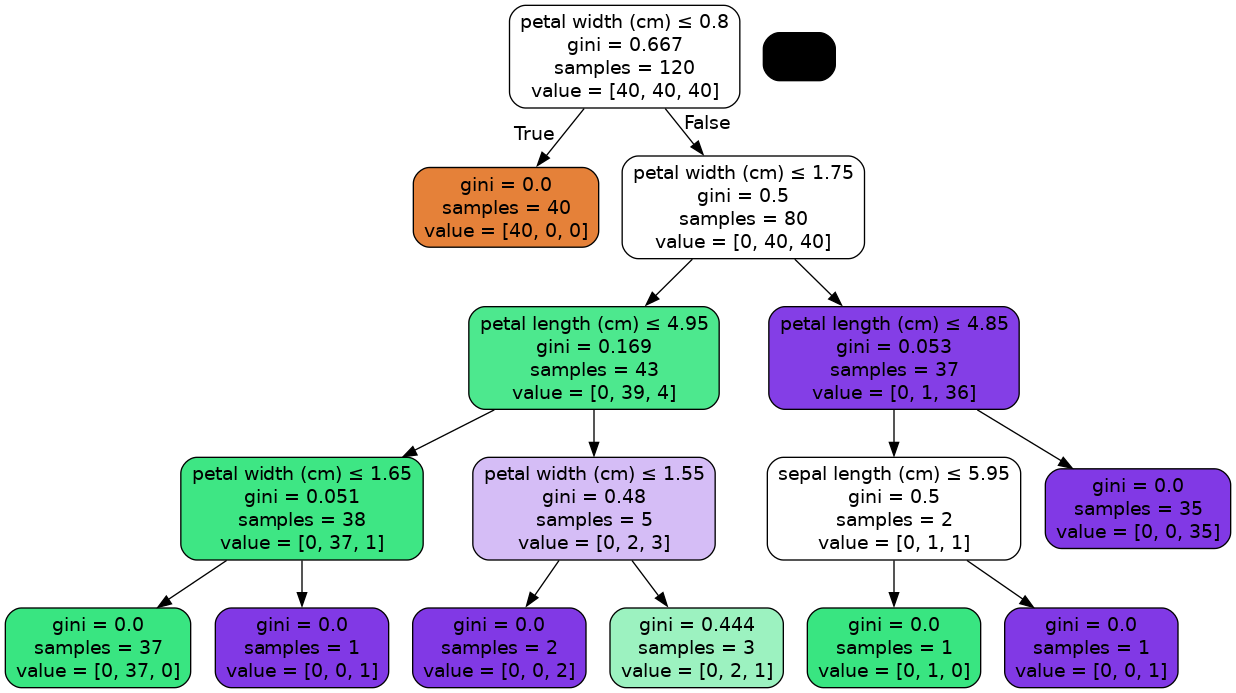

In [19]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())